In [13]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data'
sdata = read_zarr( os.path.join(  OUTPUT_DIR, 'sdata.zarr'  ) )
anndata = sc.read('/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/anndataNucA11') # reset original anndata
# delete anndata
del sdata.table
# create anndata
sdata.table = anndata

In [3]:
# count the number of principal components that explain at least 1% of the variance
n_pca = np.count_nonzero(sdata.table.uns['pca']['variance_ratio'] > 0.01)
n_pca
# play with the number of neighbors 
# Larger values result in more global views of the manifold, while smaller values result in more local data being preserved. 
# In general values should be in the range 2 to 100, default = 15
n_neighb = 15
# play with the cluster resolution
# A parameter value controlling the coarseness of the clustering. Higher values lead to more clusters. default = 1 
n_clust_res = 1
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv"

0.25
4.933695622227576
25.88941449219365
33.23624507924486
14.000246371251134
24.998684928480458
19.587219512837613
25.426291787206296
16.617983252425205
3.7529117162450545


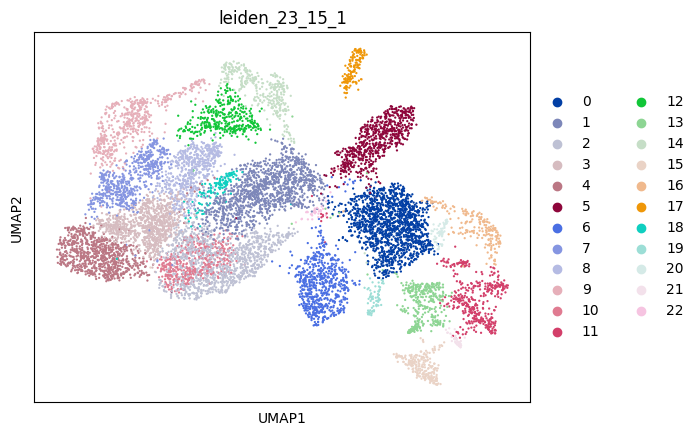

    leiden_23_15_1
0         0.126024
1         0.107143
2         0.097257
3         0.081315
4         0.073566
5         0.059227
6         0.056733
7         0.052547
8         0.051300
9         0.044888
10        0.037496
11        0.036961
12        0.032419
13        0.031439
14        0.028678
15        0.021642
16        0.018080
17        0.013270
18        0.011845
19        0.005967
20        0.005166
21        0.003741
22        0.003295
{'B cell': ['17'], 'Chol': ['15'], 'Endo vein': ['16'], 'Fibr': ['21'], 'Hepa': ['1', '2', '3', '4', '7', '8', '9', '10', '12', '14', '18'], 'Kupf': ['5', '13', '22'], 'LSEC': ['0', '19', '20'], 'Meso': ['11'], 'Stel': ['6']}


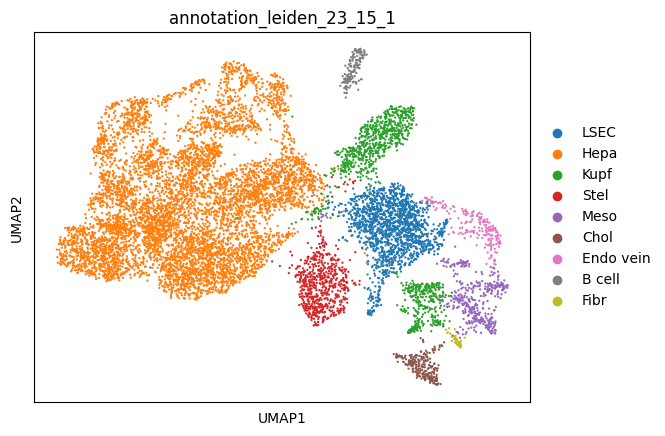

               atlas  annotation_leiden_23_15_1
B cell      0.621451                   1.327040
Chol        2.673310                   2.164232
Hepa       57.998500                  61.845387
Kupf        3.203686                   9.396152
LSEC        9.241401                  13.715711
Meso        2.796528                   3.696117
Endo vein   3.166185                   1.807980
Fibr        3.042966                   0.374065
Stel       13.768349                   5.673317
Unknown     3.487625                   0.000000


,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,0.295484,0.482843,0.113675,0.047148,0.078107,0.111511,0.046796,0.003552,NaN
1,0.550029,0.003252,NaN,0.119755,NaN,NaN,NaN,0.000629,0.030956
2,0.904219,0.003528,0.008788,0.211904,0.024651,0.086014,0.062950,0.001388,0.042930
3,1.014885,NaN,0.009428,0.244556,0.042210,0.184855,0.135827,NaN,0.015170
4,0.902658,NaN,0.007077,0.208165,0.032742,0.093093,0.057237,0.000637,NaN
5,0.216939,0.111578,0.015578,NaN,1.181335,0.106381,0.062103,0.009039,0.016458
6,0.242958,0.035244,0.050244,NaN,0.115096,1.084494,0.631016,0.001669,0.059213
7,0.859246,NaN,0.007322,0.224020,0.027180,0.227757,0.082646,NaN,0.043615
8,0.648057,NaN,NaN,0.168699,NaN,0.141526,0.103666,NaN,0.052964
9,0.782869,0.004790,NaN,0.176393,NaN,0.096773,0.068014,NaN,0.048627


In [14]:
# With norm_expr_var = True and scale_score = Robust (q=1)
scores_leiden_celltype1 = make_umap_and_perform_leiden_annotation(sdata,path_mg,n_PCAs=n_pca,n_neighbors=n_neighb,cluster_resolution=n_clust_res)
suffix = '_' + str(n_pca) + '_' + str(n_neighb) + '_' + str(n_clust_res) 
suffix_short = '_' + str(n_pca) + '_' + str(n_neighb) 
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv"
visualize_classification(sdata,'leiden'+suffix,'umap'+suffix_short,path_mg,cell_type_annotation=False,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
print(sdata.table.uns['mapping_cell_type_leiden'+suffix])
visualize_classification(sdata,'annotation_leiden'+suffix,'umap'+suffix_short,path_mg,cell_type_annotation=True,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores_leiden_celltype1

In [30]:
sdata.table.obs['cleanliness_leiden_23_15_1']

cells
64       1.250412
66       0.216256
67       0.034216
68       0.034216
69       1.284815
           ...   
28929    1.240571
28944    1.264466
28992    1.240571
29115    0.528679
29130    1.379409
Name: cleanliness_leiden_23_15_1, Length: 11228, dtype: category
Categories (23, float64): [0.481441, 1.284815, 1.240571, 1.223287, ..., 0.024436, 0.778043, 0.327492, 0.623045]

In [ ]:
# With norm_expr_var = False and scale_score = Robust (q=1)
scores_leiden_celltype2 = make_umap_and_perform_leiden_annotation(sdata,path_mg,n_PCAs=n_pca,n_neighbors=n_neighb,cluster_resolution=n_clust_res,norm_expr_var=False)
suffix = '_' + str(n_pca) + '_' + str(n_neighb) + '_' + str(n_clust_res) 
suffix_short = '_' + str(n_pca) + '_' + str(n_neighb) 
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv"
visualize_classification(sdata,'leiden'+suffix,'umap'+suffix_short,path_mg,cell_type_annotation=False,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
print(sdata.table.uns['mapping_cell_type_leiden'+suffix])
visualize_classification(sdata,'annotation_leiden'+suffix,'umap'+suffix_short,path_mg,cell_type_annotation=True,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores_leiden_celltype2

0.25


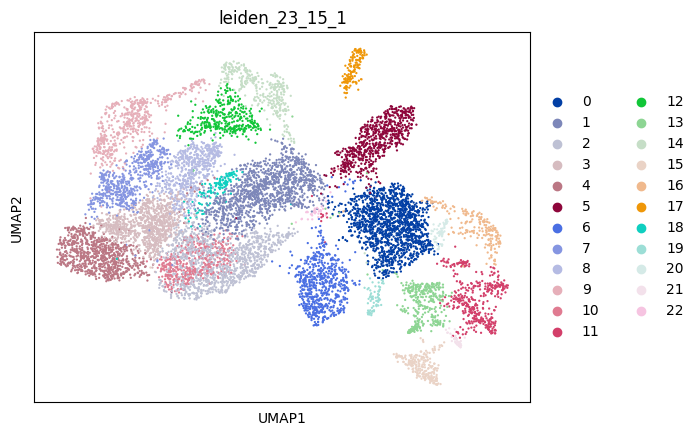

    leiden_23_15_1
0         0.126024
1         0.107143
2         0.097257
3         0.081315
4         0.073566
5         0.059227
6         0.056733
7         0.052547
8         0.051300
9         0.044888
10        0.037496
11        0.036961
12        0.032419
13        0.031439
14        0.028678
15        0.021642
16        0.018080
17        0.013270
18        0.011845
19        0.005967
20        0.005166
21        0.003741
22        0.003295
{'B cell': ['17'], 'Chol': ['15'], 'Endo vein': ['16'], 'Fibr': ['11', '21'], 'Hepa': ['1', '2', '3', '4', '7', '8', '9', '10', '12', '14', '18'], 'Kupf': ['5', '13', '22'], 'LSEC': ['0', '19', '20'], 'Stel': ['6']}


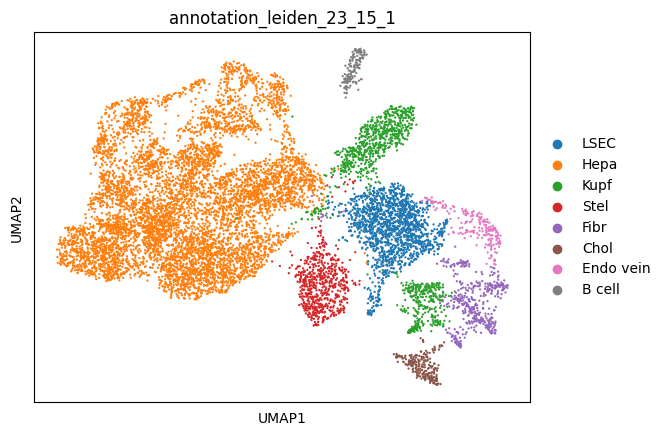

               atlas  annotation_leiden_23_15_1
B cell      0.621451                   1.327040
Chol        2.673310                   2.164232
Hepa       57.998500                  61.845387
Kupf        3.203686                   9.396152
LSEC        9.241401                  13.715711
Meso        2.796528                        NaN
Endo vein   3.166185                   1.807980
Fibr        3.042966                   4.070182
Stel       13.768349                   5.673317
Unknown     3.487625                   0.000000


,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,0.298690,0.427510,0.103279,0.041213,0.066885,0.111843,0.047357,0.003002,NaN
1,0.546834,0.002932,NaN,0.100921,NaN,NaN,NaN,0.000550,0.027095
2,0.892117,0.003176,0.008136,0.176699,0.021672,0.088568,0.061912,0.001187,0.037575
3,1.000000,NaN,0.008716,0.203550,0.036523,0.178792,0.127577,NaN,0.013278
4,0.890595,NaN,0.006584,0.173624,0.028515,0.095030,0.056764,0.000557,NaN
5,0.222120,0.098832,0.014295,NaN,1.000000,0.107160,0.061149,0.007603,0.014405
6,0.247485,0.031254,0.045740,NaN,0.098171,1.000000,0.573760,0.001423,0.051827
7,0.848275,NaN,0.006806,0.186662,0.023811,0.217954,0.079659,NaN,0.038174
8,0.642397,NaN,NaN,0.141170,NaN,0.139241,0.098599,NaN,0.046358
9,0.773819,0.004293,NaN,0.147497,NaN,0.098389,0.066475,NaN,0.042562


In [8]:
# With norm_expr_var = True and scale_score = MinMax
scores_leiden_celltype = make_umap_and_perform_leiden_annotation(sdata,path_mg,n_PCAs=n_pca,n_neighbors=n_neighb,cluster_resolution=n_clust_res,scale_score='MinMax')
suffix = '_' + str(n_pca) + '_' + str(n_neighb) + '_' + str(n_clust_res) 
suffix_short = '_' + str(n_pca) + '_' + str(n_neighb) 
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv"
visualize_classification(sdata,'leiden'+suffix,'umap'+suffix_short,path_mg,cell_type_annotation=False,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
print(sdata.table.uns['mapping_cell_type_leiden'+suffix])
visualize_classification(sdata,'annotation_leiden'+suffix,'umap'+suffix_short,path_mg,cell_type_annotation=True,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores_leiden_celltype

0.25


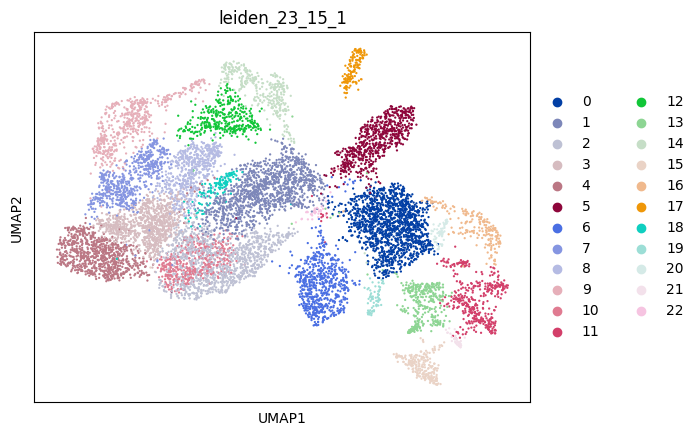

    leiden_23_15_1
0         0.126024
1         0.107143
2         0.097257
3         0.081315
4         0.073566
5         0.059227
6         0.056733
7         0.052547
8         0.051300
9         0.044888
10        0.037496
11        0.036961
12        0.032419
13        0.031439
14        0.028678
15        0.021642
16        0.018080
17        0.013270
18        0.011845
19        0.005967
20        0.005166
21        0.003741
22        0.003295
{'B cell': ['17', '22'], 'Chol': ['15'], 'Endo vein': ['16', '19'], 'Fibr': ['11', '21'], 'Hepa': ['2', '3', '4', '7', '8', '9', '10', '12', '14', '18'], 'Kupf': ['5', '13'], 'LSEC': ['0', '20'], 'Meso': ['1'], 'Stel': ['6']}


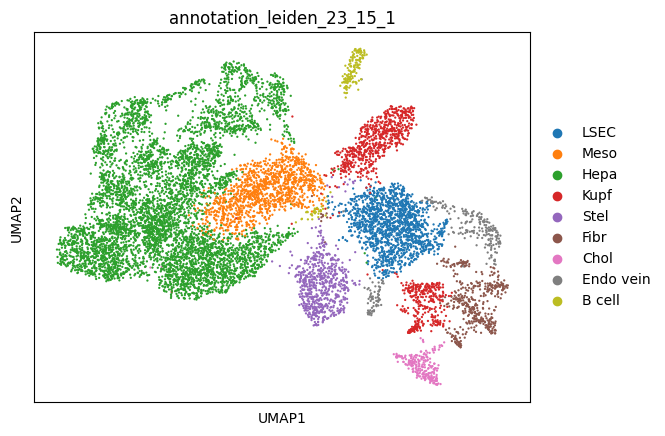

               atlas  annotation_leiden_23_15_1
B cell      0.621451                   1.656573
Chol        2.673310                   2.164232
Hepa       57.998500                  51.131101
Kupf        3.203686                   9.066619
LSEC        9.241401                  13.118988
Meso        2.796528                  10.714286
Endo vein   3.166185                   2.404703
Fibr        3.042966                   4.070182
Stel       13.768349                   5.673317
Unknown     3.487625                   0.000000


,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,-3.460093,10.989380,2.278675,-1.790231,-1.301024,-1.822716,-2.907918,-0.432275,NaN
1,-0.427371,-2.828320,NaN,-0.586995,NaN,NaN,NaN,-0.482294,-0.268901
2,3.792530,-2.820380,-1.384843,0.940080,-2.826036,-2.437137,-2.427748,-0.469303,-0.219206
3,5.111039,NaN,-1.362488,1.481186,-2.325098,-0.055361,-0.261462,NaN,-0.334417
4,3.773936,NaN,-1.444598,0.878113,-2.595199,-2.266554,-2.597574,-0.482150,NaN
5,-4.395898,0.292705,-1.147669,NaN,30.171808,-1.946341,-2.452922,-0.338389,-0.329075
6,-4.085902,-1.906594,0.063132,NaN,-0.245806,21.623266,14.458159,-0.464492,-0.151628
7,3.256718,NaN,-1.436028,1.140859,-2.753880,0.978454,-1.842269,NaN,-0.216365
8,0.740560,NaN,NaN,0.224099,NaN,-1.099450,-1.217452,NaN,-0.177561
9,2.346745,-2.784031,NaN,0.351591,NaN,-2.177873,-2.277228,NaN,-0.195563


In [9]:
# With norm_expr_var = True and scale_score = None
scores_leiden_celltype = make_umap_and_perform_leiden_annotation(sdata,path_mg,n_PCAs=n_pca,n_neighbors=n_neighb,cluster_resolution=n_clust_res,scale_score='None')
suffix = '_' + str(n_pca) + '_' + str(n_neighb) + '_' + str(n_clust_res) 
suffix_short = '_' + str(n_pca) + '_' + str(n_neighb) 
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv"
visualize_classification(sdata,'leiden'+suffix,'umap'+suffix_short,path_mg,cell_type_annotation=False,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
print(sdata.table.uns['mapping_cell_type_leiden'+suffix])
visualize_classification(sdata,'annotation_leiden'+suffix,'umap'+suffix_short,path_mg,cell_type_annotation=True,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores_leiden_celltype

0.25
4.98317997455557
26.665816500277018
34.54620898442347
15.040763019353275
26.111257595255353
20.387404074880113
26.215112306557316
17.568142141506062
3.824863890268286


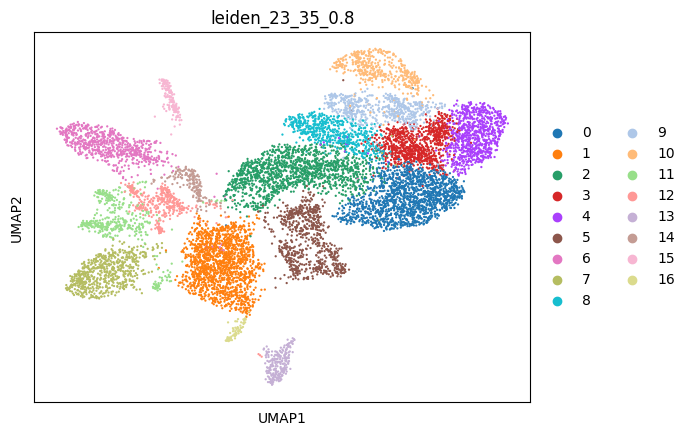

    leiden_23_35_0.8
0           0.135910
1           0.133684
2           0.122105
3           0.082561
4           0.074724
5           0.063858
6           0.060029
7           0.055843
8           0.052636
9           0.050410
10          0.040702
11          0.037317
12          0.035002
13          0.021375
14          0.014784
15          0.013092
16          0.005967
{'B cell': ['15'], 'Chol': ['13'], 'Endo vein': ['14'], 'Hepa': ['0', '2', '3', '4', '5', '8', '9', '10'], 'Kupf': ['6', '12'], 'LSEC': ['1', '16'], 'Meso': ['11'], 'Stel': ['7']}


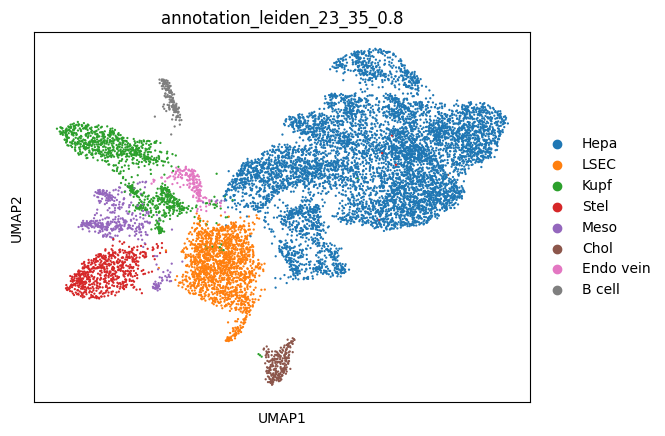

               atlas  annotation_leiden_23_35_0.8
B cell      0.621451                     1.309227
Chol        2.673310                     2.137513
Hepa       57.998500                    62.290702
Kupf        3.203686                     9.503028
LSEC        9.241401                    13.965087
Meso        2.796528                     3.731742
Endo vein   3.166185                     1.478447
Fibr        3.042966                          NaN
Stel       13.768349                     5.584254
Unknown     3.487625                     0.000000


In [15]:
# other good parameters for n_neighbors and cluster_resolution
n_neighb = 35    
n_clust_res = 0.8
scores = make_umap_and_perform_leiden_annotation(sdata,path_mg,n_PCAs=n_pca,n_neighbors=n_neighb,cluster_resolution=n_clust_res)
suffix = '_' + str(n_pca) + '_' + str(n_neighb) + '_' + str(n_clust_res) 
suffix_short = '_' + str(n_pca) + '_' + str(n_neighb) 
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv"
visualize_classification(sdata,'leiden'+suffix,'umap'+suffix_short,path_mg,cell_type_annotation=False,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
print(sdata.table.uns['mapping_cell_type_leiden'+suffix])
visualize_classification(sdata,'annotation_leiden'+suffix,'umap'+suffix_short,path_mg,cell_type_annotation=True,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores